In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [41]:
halo = np.load('halostatistics.npy')
mass =  halo[0]
number = halo[1]
radius = halo[2]
totmass = halo[3]

In [56]:
halo.shape

(4, 747)

In [42]:
bins = (np.amax(mass) - np.amin(mass)) / 10**11

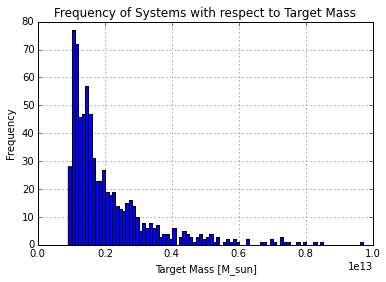

In [43]:
plt.hist(mass,bins)
plt.title('Frequency of Systems with respect to Target Mass')
plt.xlabel('Target Mass [M_sun]')
plt.ylabel('Frequency')
plt.grid()
plt.show()

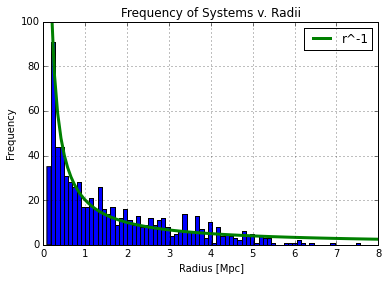

In [95]:
bin_size = 0.1
binss = (np.amax(radius) - np.amin(radius)) / bin_size
n,b,histogram = plt.hist(radius,binss)
ex = np.linspace(.1, 8, 100)
why = 20 / (ex)
plt.ylim(0,100)
line, = plt.plot(ex, why,lw=3)
plt.legend([line],["r^-1"])
plt.title('Frequency of Systems v. Radii')
plt.xlabel('Radius [Mpc]')
plt.ylabel('Frequency')
plt.grid()
#plt.show()
plt.savefig('frequencyvradii.png')

In [94]:
binmax = np.where(n == n.max())
print b[binmax][0]

0.183676196897


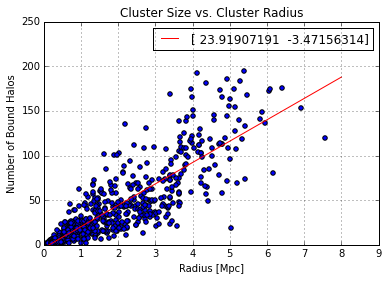

In [84]:
plt.scatter(radius, number)
fit = np.polyfit(radius,number,1)
x = np.linspace(0,8,radius.shape[0])
y = fit[0]*x + fit[1]
plt.plot(x,y, color = 'red', label = fit)
plt.xlim(0)
plt.ylim(0)
plt.grid()
plt.legend()
plt.title('Cluster Size vs. Cluster Radius')
plt.xlabel('Radius [Mpc]')
plt.ylabel('Number of Bound Halos')
plt.show()

In [85]:
def stats(mass,radius, massin, massincrem):
    ub = massin + massincrem
    #print "current mass", massin
    #print "ub", ub
    where = np.where(np.logical_and(mass>=massin,mass<=ub))
    #print where
    mcombined = mass[where]
    rcombined = radius[where]
    mavg = np.sum(mcombined) / mcombined.shape[0]
    ravg = np.sum(rcombined) / rcombined.shape[0]
    mstd = np.std(mcombined)
    rstd = np.std(rcombined)
    #print mcombined.shape[0]
    
    return mavg, mstd, ravg, rstd

#def radstats(radius, j, radincrem):
#    ub = j + radincrem
#    combined = radius[(radius >= j) & (radius <= ub)]
#    average = np.sum(combined) / combined.shape[0]
#    std = np.std(combined)
                 
#    return average, std
    
def splitbins(mass, radius):
    numbins = 20
    massbins = np.zeros([2,numbins + 10])
    radbins = np.zeros([2, numbins + 10])
    massincrem = (np.amax(mass)-np.amin(mass)) / numbins
    radincrem = (np.amax(radius)-np.amin(radius)) / numbins

    i = 0
    radin = 0.0
    massin = 0.0
    
    while (massin < np.amax(mass) - 3*massincrem):
        #print i
        massbins[0,i],massbins[1,i], radbins[0,i], radbins[1,i] = stats(mass, radius, massin, massincrem)
        i += 1
        radin += radincrem
        massin += massincrem
    
    return massbins, radbins

def nomorenan(mplot, rplot):
    where = np.where(np.isnan(mplot[0]) != True)
    mavg = mplot[0,where]
    ravg = rplot[0,where]
    mstd = mplot[1,where]
    rstd = rplot[1,where]
    
    return mavg, mstd, ravg, rstd

def plotitradvmass(xplot, yplot):
    xavg, xstd, yavg, ystd = nomorenan(xplot, yplot)

    plt.errorbar(xavg[0],yavg[0], xerr = xstd[0], yerr = ystd[0]) 
    fits = np.polyfit(xavg[0],yavg[0],1)
    x = np.linspace(0, np.amax(xavg[0]),17)
    y = fits[0] * x + fits[1]
    plt.ylim(0)
    plt.plot(x,y, color = 'red', label = fits)
    plt.grid()
    plt.legend()
    plt.title('Cluster Radius vs. Halo Mass')
    plt.xlabel('Target Halo Mass [M_sun]')
    plt.ylabel('Radius [Mpc]')
    plt.savefig('clustradvhalomass.png')
    
    plt.show()
    
def plotitsizevrad(xplot, yplot):
    xavg, xstd, yavg, ystd = nomorenan(xplot, yplot)

    plt.errorbar(xavg[0],yavg[0], xerr = xstd[0], yerr = ystd[0]) 
    fits = np.polyfit(xavg[0],yavg[0],1)
    x = np.linspace(0, np.amax(xavg[0]),17)
    y = fits[0] * x + fits[1]
    plt.ylim(0)
    plt.plot(x,y, color = 'red', label = fits)
    plt.grid()
    plt.legend()
    plt.title('Cluster Size vs. Cluster Radius')
    plt.xlabel('Radius [Mpc]')
    plt.ylabel('Number of Bound Halos')
    plt.savefig('clustsizevrad.png')
    
    plt.show()

def plotitclustmassvrad(xplot, yplot):
    xavg, xstd, yavg, ystd = nomorenan(xplot, yplot)

    plt.errorbar(xavg[0],yavg[0], xerr = xstd[0], yerr = ystd[0]) 
    fits = np.polyfit(xavg[0],yavg[0],1)
    x = np.linspace(0, np.amax(xavg[0]),17)
    y = fits[0] * x + fits[1]
    plt.ylim(0)
    plt.plot(x,y, color = 'red', label = fits)
    plt.grid()
    plt.legend()    
    plt.title('Cluster Mass vs. Cluster Radius')
    plt.xlabel('Radius[Mpc]')
    plt.ylabel('Cluster Mass [M_sun]')
    plt.savefig('clustmassvsrad.png')
    
    plt.show()

/home/okeefe/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: RuntimeWarning: invalid value encountered in double_scalars
/home/okeefe/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: invalid value encountered in double_scalars


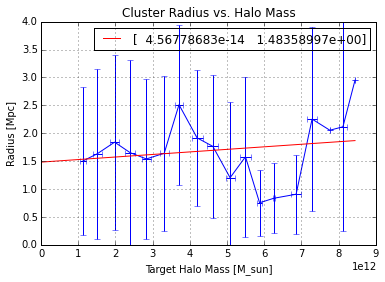

In [86]:
mplot, rplot = splitbins(mass, radius)
where = np.where(rplot[0,:] != 0)
newmplot = mplot[:,where]
nnewmplot = np.zeros([2,20])
nnewmplot[0,:] = newmplot[0,0,:]
nnewmplot[1,:] = newmplot[1,0,:]
newrplot = rplot[:,where]
nnewrplot = np.zeros([2,20])
nnewrplot[0,:] = newrplot[0,0,:]
nnewrplot[1,:] = newrplot[1,0,:]
#print newrplot
plotitradvmass(nnewmplot, nnewrplot)

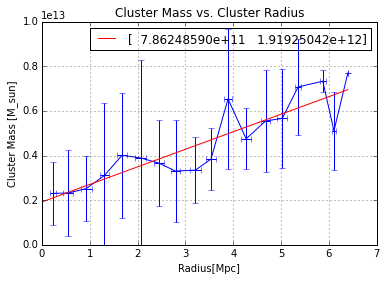

In [87]:
mplot, rplot = splitbins(radius, totmass)
where = np.where(rplot[0,:] != 0)
newmplot = mplot[:,where]
nnewmplot = np.zeros([2,18])
nnewmplot[0,:] = newmplot[0,0,:]
nnewmplot[1,:] = newmplot[1,0,:]
newrplot = rplot[:,where]
nnewrplot = np.zeros([2,18])
nnewrplot[0,:] = newrplot[0,0,:]
nnewrplot[1,:] = newrplot[1,0,:]
#print newrplot
plotitclustmassvrad(nnewmplot, nnewrplot)

In [49]:
print newrplot

[[[  2.30502256e+12   2.31923860e+12   2.51455868e+12   3.10740992e+12
     4.01095423e+12   3.89179600e+12   3.66218656e+12   3.30083391e+12
     3.34450599e+12   3.83720594e+12   6.53484796e+12   4.74764356e+12
     5.54967152e+12   5.66318066e+12   7.07384284e+12   7.32973823e+12
     5.10502170e+12   7.70023480e+12]]

 [[  1.40449259e+12   1.90752951e+12   1.46652287e+12   3.24204399e+12
     2.80152407e+12   4.38156280e+12   1.93438368e+12   2.27360554e+12
     1.48103194e+12   1.38834494e+12   3.14085600e+12   1.37350947e+12
     2.30200861e+12   2.21829575e+12   2.13423300e+12   5.03858909e+11
     1.75945836e+12   0.00000000e+00]]]


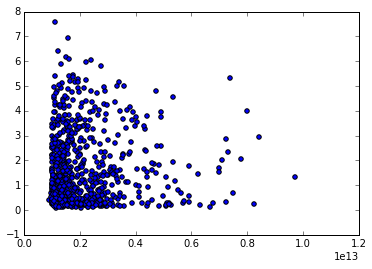

In [50]:
plt.scatter(mass, radius)

[[ 0.23870311  0.54797207  0.92546474  1.30850585  1.67704544  2.06437336
   2.44387294  2.79662189  3.20783633  3.53592817  3.89295852  4.27130096
   4.67810293  5.02651519  5.35727599  5.87393921  6.10688526  6.39833064
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.0629477   0.10991001  0.11321545  0.10206896  0.10781673  0.11513393
   0.10713478  0.10132305  0.11087174  0.113043    0.08952365  0.10338232
   0.1010192   0.10557061  0.06987673  0.06110236  0.04467506  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[[   3.19760479   10.56910569   19.79746835   28.98591549   36.54
    43.19148936   51.84848485   51.94736842   51.54545455   75.02941176
   117.9         102.2         116.15384615  121.07142857  144.57142857
   142.          142.33333333  176.            0.            0.        

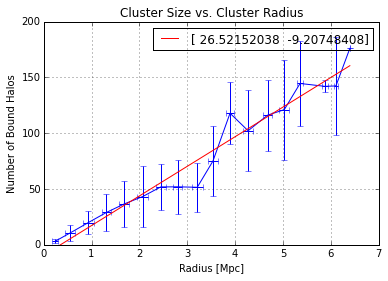

In [88]:
rplot, nplot = splitbins(radius, number)
print rplot
print nplot
where = np.where(rplot[0,:] != 0)
newnplot = nplot[:,where]
nnewnplot = np.zeros([2,18])
nnewnplot[0,:] = newnplot[0,0,:]
nnewnplot[1,:] = newnplot[1,0,:]
newrplot = rplot[:,where]
nnewrplot = np.zeros([2,18])
nnewrplot[0,:] = newrplot[0,0,:]
nnewrplot[1,:] = newrplot[1,0,:]
plotitsizevrad(nnewrplot,nnewnplot)